In [1]:
def load_accs(method, num_clients, rounds, local_epochs):
    method_filename = lambda method: f'results/{num_clients}_clients_{rounds}_rounds_{local_epochs}_epochs_{method}.lst'

    with open(f'{method_filename(method)}', 'r') as f:
        results = eval(f.read())
        accs = [result for step, result in results]
    
    return accs

In [100]:
num_clients = 10
num_rounds = 50
local_epochs = 20

cycle_cons_accs = load_accs('cyclecons', num_clients, num_rounds, local_epochs)

fedavg_accs = load_accs('fedavg', num_clients, num_rounds, local_epochs)

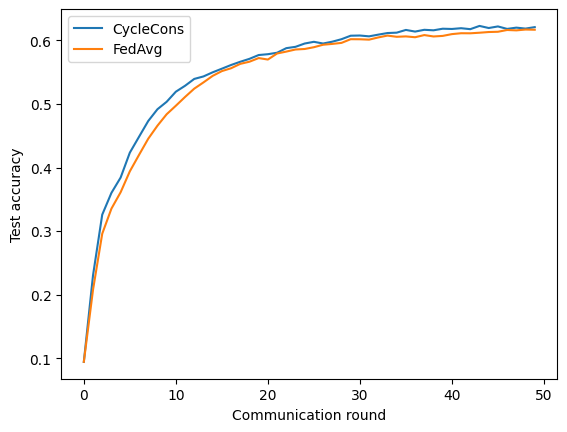

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accs(cycle_cons, fed_avg):
    plt.plot(np.arange(len(cycle_cons)), cycle_cons, label='CycleCons')
    plt.plot(np.arange(len(fed_avg)), fed_avg, label='FedAvg')

    plt.xlabel('Communication round')
    plt.ylabel('Test accuracy')
    plt.legend()
    plt.show()


plot_accs(cycle_cons_accs, fedavg_accs)

In [112]:
[i for i in range(0, num_rounds, 5)]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [114]:
multiplies_of_5 = [i for i in range(0, num_rounds, 5)]

cycle_cons_accs_5 = [cycle_cons_accs[i] for i in multiplies_of_5]
fedavg_accs_5 = [fedavg_accs[i] for i in multiplies_of_5]

In [115]:
from pprint import pprint 

print_without_commas = lambda x: ' | '.join([str(round(el, 4)) for el in x])

def table_row(accs, rounds):
    
    table_row =  '| 1 |' + '| '.join(str(i) for i in rounds) + f'| 50 |\n' + '| -- ' + ' | --'*9 + '|\n' +  '|' + print_without_commas(accs) + '|\n'
    print(table_row) 


In [116]:
# rounds = range(2, 10)
rounds_5 = [i for i in range(5, num_rounds, 5)]
table_row(cycle_cons_accs_5, rounds_5)

| 1 |5| 10| 15| 20| 25| 30| 35| 40| 45| 50 |
| --  | -- | -- | -- | -- | -- | -- | -- | -- | --|
|0.0941 | 0.4234 | 0.5193 | 0.5555 | 0.5783 | 0.5978 | 0.6077 | 0.6165 | 0.618 | 0.622|



In [117]:
table_row(fedavg_accs_5, rounds_5)

| 1 |5| 10| 15| 20| 25| 30| 35| 40| 45| 50 |
| --  | -- | -- | -- | -- | -- | -- | -- | -- | --|
|0.0942 | 0.394 | 0.4972 | 0.5517 | 0.5699 | 0.5893 | 0.6018 | 0.6063 | 0.6099 | 0.6136|



In [119]:
import pandas as pd

df = pd.DataFrame(cycle_cons_accs)

writer = pd.ExcelWriter('test.xlsx')
df.to_excel(writer, sheet_name='welcome', index=True)

In [35]:
writer.close()